In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Iris Dataset

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
X = iris["data"]

print(X.shape)
X[0:5]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
data = pd.DataFrame(X, columns=iris["feature_names"])
data["species"] = y

num_species = len(data["species"].unique())

print("The total number of species = {}".format(num_species))

print(data.shape)
data.head()

The total number of species = 3
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Visualize

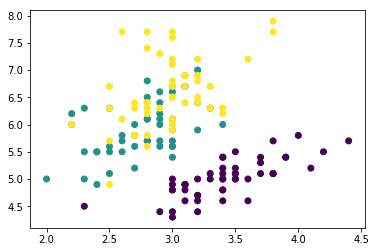

In [7]:
plt.scatter(data["sepal width (cm)"], data["sepal length (cm)"], c=data["species"])

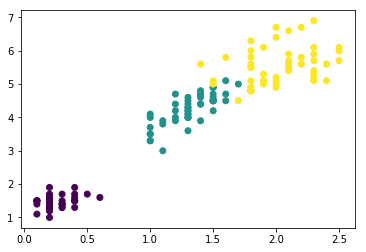

In [8]:
plt.scatter(data["petal width (cm)"], data["petal length (cm)"], c=data["species"])

# Preprocessing

In [9]:
num_species = len(np.unique(y))

y_hot = np.eye(num_species)[y]

print(y_hot.shape)
y_hot[0:10]

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# Define Sigmoid

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

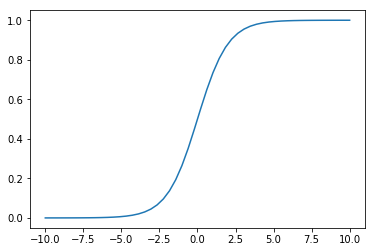

In [11]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

# Gradient Descent

In [13]:
num_epoch = 300
learning_rate = 1.0

w = np.random.uniform(low=-1.0, high=1.0, size=(4,3))
b = np.random.uniform(low=-1.0, high=1.0, size=(1,3))

print(w.shape, b.shape, b)

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    predict = y_predict_hot.argmax(axis=1)
    accuracy = (predict == y).mean()
    if accuracy > 0.95:
        break
        
    if epoch % 10 == 0:
        print("{:2} accuracy = {:.6f}".format(epoch, accuracy))
        
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot) / X.shape[0]
    b = b - learning_rate * (y_predict_hot - y_hot).mean(axis=0)
    
print("---" * 10)
print("{:2} accuracy = {:.6f}".format(epoch, accuracy))

(4, 3) (1, 3) [[-0.13547473 -0.99918526 -0.8870328 ]]
 0 accuracy = 0.306667
10 accuracy = 0.353333
20 accuracy = 0.666667
30 accuracy = 0.666667
40 accuracy = 0.673333
50 accuracy = 0.666667
------------------------------
54 accuracy = 0.966667


In [14]:
y_predict_hot = X.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)

predict = y_predict_hot.argmax(axis=1)

result = data.copy()
result["species(predict)"] = predict

result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species(predict)
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0
